# Atividade da Semana 08

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido.

Sendo assim, a partir dos dados filtrados para 2020, calcule a média, mediana, mínimo, máximo, amplitude, variância e desvio padrão.

In [1]:
# Instalando o pacote 'ipeadatapy'
!pip install ipeadatapy

In [2]:
# Questao 1

# Carregando pacotes
import pandas as pd
import ipeadatapy

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('ANFAVE12_LICVEN12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(emplacamentos["DATE"] >= "2020-01-01") & (emplacamentos["DATE"] < "2021-01-01"),
                                  "VALUE (-)"]
emplacamentos.rename("emplacamentos", inplace=True)
emplacamentos

,emplacamentos
756,171155.0
757,179925.0
758,146460.0
759,47368.0
760,52396.0
761,115726.0
762,155692.0
763,165524.0
764,188514.0
765,196045.0


In [3]:
# Questao 1 (continuacao)

# Calcule as estatísticas de interesse
# Calculando estatísticas
media = emplacamentos.mean()
mediana = emplacamentos.median()
minimo = emplacamentos.min()
maximo = emplacamentos.max()
amplitude = maximo - minimo
variancia = emplacamentos.var()
desvio_padrao = emplacamentos.std()

# Exibindo os resultados
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")
print(f"Amplitude: {amplitude:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")






Média: 153901.50
Mediana: 168339.50
Mínimo: 47368.00
Máximo: 222916.00
Amplitude: 175548.00
Variância: 3148797478.64
Desvio Padrão: 56114.15


###Questão 2

Ao observar a base de dados utilizada na questão anterior, argumente por que a moda não é uma medida útil para descrever o número de emplacamento de automóveis ao longo dos meses de 2020.

A moda é definida como o valor que aparece com maior frequência em um conjunto de dados. No contexto dos emplacamentos de automóveis ao longo dos meses de 2020, a moda pode não ser uma medida útil por várias razões:

Variabilidade Mensal: O número de emplacamentos de veículos pode variar significativamente de mês para mês devido a fatores sazonais, promoções de vendas, lançamentos de novos modelos e mudanças nas condições econômicas. Essa variabilidade pode resultar em uma moda que não representaria adequadamente o comportamento geral dos dados.
Dados Contínuos: Os dados de emplacamentos são contínuos e podem ter muitos valores diferentes, especialmente se a amostra for grande. Em situações onde muitos valores ocorrem com a mesma frequência, a moda pode ser difícil de identificar ou não fornecer informações relevantes.
Sensibilidade a Outliers: Se houver meses com números anormalmente altos ou baixos de emplacamentos (outliers), a moda pode ser influenciada por esses valores extremos, distorcendo a interpretação dos dados.
Foco em Tendências: Em vez de se concentrar em um único valor (a moda), é mais útil considerar medidas como a média ou a mediana, que fornecem uma visão mais equilibrada do comportamento geral dos emplacamentos ao longo do tempo.
Interpretação Limitada: A moda pode não fornecer informações suficientes sobre a distribuição dos dados. Por exemplo, é possível ter uma moda que não representa a maioria dos meses, especialmente se o número de emplacamentos é muito semelhante em várias categorias.
Conclusão
Em resumo, enquanto a moda pode ser uma medida útil em algumas situações, no caso dos emplacamentos de automóveis ao longo de 2020, ela pode ser menos informativa devido à variabilidade dos dados, à natureza contínua das observações e à necessidade de uma análise mais abrangente que considere as tendências gerais. Para entender melhor o cenário dos emplacamentos, é mais eficaz usar medidas como a média e a mediana, que oferecem uma visão mais completa da distribuição dos dados.




###Questão 3

O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil. Abaixo, obtemos os dados da arrecadação do IPI sobre automóveis em 2020.

Calcule a correlação entre o número de veículos emplacados e o IPI arrecadado em 2020.

In [4]:
# Questao 3

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2020-01-01") & (ipi["DATE"] < "2021-01-01"),
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros

,emplacamentos,ipi
0,171155.0,4785.822271
1,179925.0,4286.729125
2,146460.0,4284.937666
3,47368.0,3593.955607
4,52396.0,3251.181033
5,115726.0,3606.153437
6,155692.0,4296.958069
7,165524.0,5055.511196
8,188514.0,5670.267089
9,196045.0,6059.809830


In [5]:
# Questao 3 (continuacao)

# Calcule a correlacao entre o numero de emplacamentos e o IPI recolhido pela União.
# Calculando a correlação
correlacao = carros.corr().iloc[0, 1]  # A correlação entre emplacamentos e IPI

# Exibindo o resultado
print(f"Correlação entre emplacamentos e IPI arrecadado em 2020: {correlacao:.2f}")


Correlação entre emplacamentos e IPI arrecadado em 2020: 0.85


###Questão 4

Com a base de dados `carros`, faça um gráfico de dispersão utilizando `plt.scatter` entre `emplacamentos` e `ipi`.

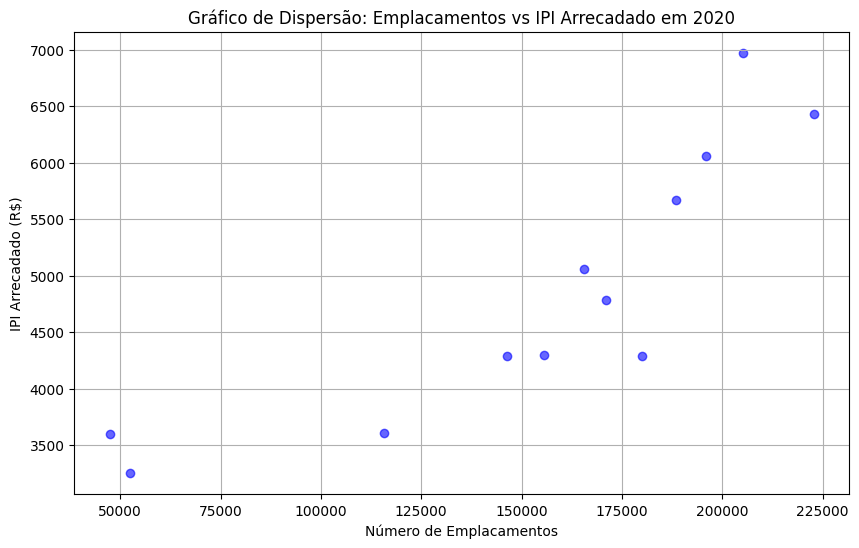

In [6]:
# Questao 4
from matplotlib import pyplot as plt

# Grafico de dispersao
plt.figure(figsize=(10, 6))
plt.scatter(carros['emplacamentos'], carros['ipi'], color='blue', alpha=0.6)
plt.title('Gráfico de Dispersão: Emplacamentos vs IPI Arrecadado em 2020')
plt.xlabel('Número de Emplacamentos')
plt.ylabel('IPI Arrecadado (R$)')
plt.grid()

# Exibe o gráfico
plt.show()

###Questão 5

Com base nas questões 3 e 4, como você interpretaria o valor do coeficiente de correlação observado? O que ocorre com a arrecadação do IPI quando o número de veículos emplacados aumenta?

O coeficiente de correlação mede a força e a direção da relação linear entre duas variáveis. Ele varia de -1 a 1, onde:

1 indica uma correlação positiva perfeita (à medida que uma variável aumenta, a outra também aumenta).
-1 indica uma correlação negativa perfeita (à medida que uma variável aumenta, a outra diminui).
0 indica nenhuma correlação linear.
Interpretação do Coeficiente de Correlação entre Emplacamentos e IPI
Valor Positivo: Se o coeficiente de correlação obtido entre o número de veículos emplacados e o IPI arrecadado for positivo e relativamente alto (por exemplo, acima de 0,5), isso sugeriria que há uma relação direta entre as duas variáveis. Nesse caso, à medida que o número de emplacamentos aumenta, a arrecadação do IPI também tende a aumentar.
Valor Próximo de 1: Um coeficiente próximo de 1 indicaria que a arrecadação do IPI cresce de maneira proporcional ao aumento no número de emplacamentos, o que faz sentido, já que um maior número de veículos significa mais vendas, resultando em maior arrecadação do imposto.
Valor Fraco ou Negativo: Se o coeficiente for baixo ou negativo, isso indicaria que a relação é fraca ou que, de fato, um aumento nos emplacamentos não resulta em um aumento significativo na arrecadação do IPI. Um coeficiente negativo poderia sugerir que, em determinadas circunstâncias, o aumento dos emplacamentos poderia estar associado a uma diminuição na arrecadação, o que seria menos comum.
Conclusão
Em resumo, se a correlação for positiva e forte, podemos concluir que um aumento no número de veículos emplacados está associado a um aumento na arrecadação do IPI. Essa relação pode ser interpretada como um reflexo da saúde do mercado automotivo e do poder aquisitivo da população: mais emplacamentos indicam mais vendas de automóveis, o que, por sua vez, gera mais receita através do IPI. Se a correlação for fraca ou negativa, isso exigiria uma análise mais aprofundada dos fatores que influenciam essas variáveis.